# Graphing the Trajectory of a Fastball and Curveball



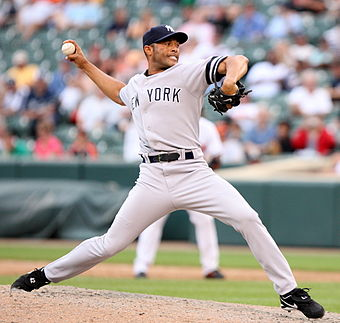


   This project is a plot of three different baseball pitches, a fastball and a curveball. The plot will show the two pitches being released from a pitching mound 60 feet away from home plate and follow them until they cross home plate. The trajectory of the ball will be viewed from the side, allowing the different movement of each pitch to be clearely viewed. 
    When considering a baseball being thrown, one must first consider the forces affecting the ball. These can be shown in a free body diagram.
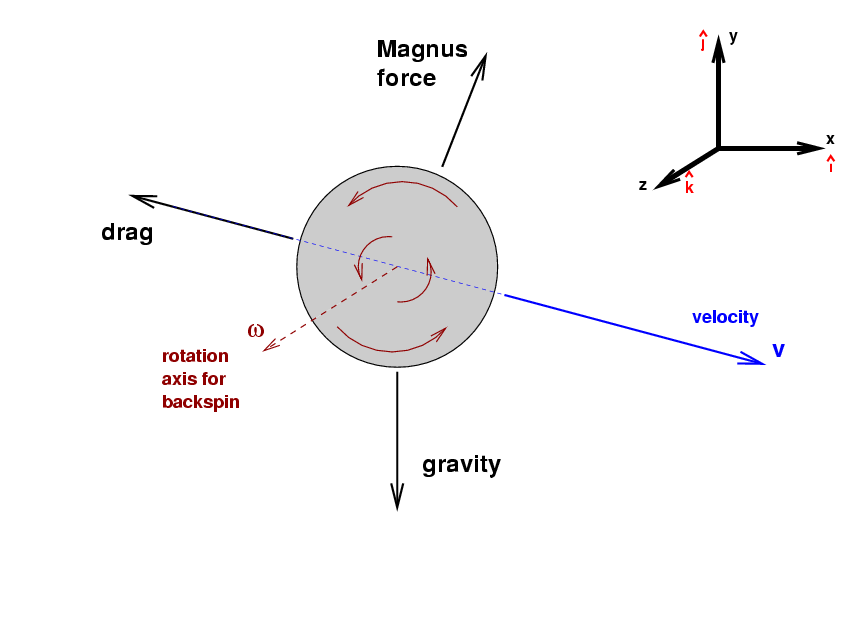
Shown on the ball are the force of Gravity, Fg, the drag force Fd, and Magnus Force, Fm. 
$$ Fg = m*g$$
$$ Fd = -1/2*p*A*C*v^2*vhat$$
$$ Fm = 1/2*p*A*Cm*v^2*Fhat$$

For the above equations,
$$m = .145kg$$
$$g = 9.81m/s$$
p = density, which for a baseball is 1.23 kg

A = cross sectional area of the baseball, which is .00426 square meters

C = drag coefficient, .4

Cm = magnus force coefficient, .3

vhat and Fhat = are just there to determine the direction of the vector

   Outside the sum of forces there are many other things such as spin axis, spin efficiency, useful spin, the height and release point of the picther, altitude, etc. Since this is a basic model, some of the more complex factors have been disregarded.
    
    


   As for the code itself, in order to effectively graph this basic trajectory, I utilized numpy, pylab, and fourth order runge-kutta.

# Fastball:

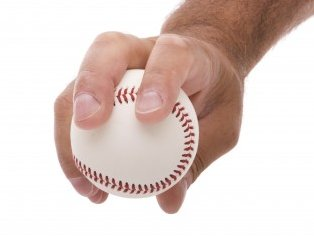
The 4-seam fastball is the most basic pitch in baseball. As the name implies, it is the fastest kind of pitch, with a max recorderd velocity of 105 mph. When thrown, the maximum amount of backspin possible is placed on the ball. This causes the Magnus Force to act in the possitive y direction, like in the Free Body Diagram, which counteracts the Force of Gravity as much as possible, allowing the ball to fly in an almost straight path. The fastball in my graph is being thrown with a spin rate of 42.199 rps or 2531 rpm and a velocity of 44.256 m/s or 99 mph, an above average fastball by MLB standards.

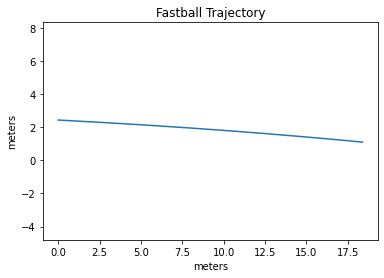

In [14]:

from math import cos, sin
import numpy as np
import pylab as py
#Givens
d=.07366# diameter of a baseball in meters
m=.145 #kg
spin=42.199#rps
dist=18.44#meters from mound to plate
p= 1.23 #density of baseball in kg
C= .4 #drag coefficient
Cm= .3 #magnus coefficient for a baseball
A= .00426 #cross-sectional area in square meters
vhat=1
Fhat=1

def f(rt):
    vx = rt[2]
    vy = rt[3]
    v = np.sqrt(vx**2 + vy**2)
    Fm=(1/2)*p*A*Cm*v**2*Fhat
    Fg=m*(9.81) 
    Fd=(1/2)*p*A*C*v**2*vhat
    sa = 45*np.pi/180 #spin axis in degrees
    phi = np.arccos(vx/v)
    ax = 1/m*(Fm*cos(sa)-Fd*cos(phi)) #Forces in x 
    ay = 1/m*(Fm*cos(sa)-Fd*sin(phi)-Fg) #Forces in y 
    return np.array([vx,vy,ax,ay])

def pitch():
    x=0 #distance from pitcher's mound when released, is 0 for simiplicity sake
    y=2.438 #height ball is released from in meters
    v=43.8099 #initital velocity m/s
    
    vx=v*cos(3*np.pi/180) #velocity in the x
    vy=v*sin(-3*np.pi/180) #velocity in the y
    h = .001 # dt in s
    r = np.array([x,y,vx,vy])
    xpoints = []
    ypoints = []
    while r[0] < 18.44 and r[1] > 0.0: #Runge-Kutta
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r +=  (k1+2*k2+2*k3+k4)/6 
    
    py.plot(xpoints,ypoints)
    py.axis('equal')
    py.xlabel('meters')
    py.ylabel('meters')
    py.title('Fastball Trajectory')
    py.show() 
    
def main():
    pitch()
if __name__=="__main__":
    main()

# Curveball

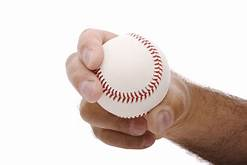
The curveball is a type of breaking ball. The ball typically drops either straight down in a 12-6 motion or breaks down and towards the glove side of the pitcher. This motion is due to the ball being thrown with topspin, the exact opposite of the 4-seam fastball, causing the Magnus force to act downwards on the ball, causing this drastic drop. This curveball is being thrown with a spin rate of 51.433 rps or 3085 rpm and with a velocity of 39.339 m/s or 88.133 mph, this would be a very above average curveball in the MLB.

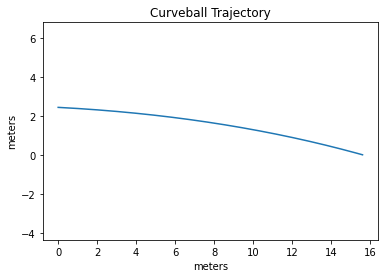

In [16]:
from math import cos, sin
import numpy as np
import pylab as py
# Givens
d=.07366# diameter of a baseball meters
m=.145 #kg
spin=51.433#rps
dist=18.44#meters from mound to plate
p= 1.23 #density of baseball in kg
C= .4 #drag coefficient
Cm= .3 #magnus coefficient for a baseball
A= .00426 #cross-sectional area in square meters
vhat=1
Fhat=1

def f(rt):
    vx = rt[2]
    vy = rt[3]
    v = np.sqrt(vx**2 + vy**2)
    Fm=(1/2)*p*A*Cm*v**2*Fhat
    Fg=m*(9.81) 
    Fd=(1/2)*p*A*C*v**2*vhat
    
    sa = 45*np.pi/180 #spin axis in degrees
    phi = np.arccos(vx/v)
    ax = 1/m*(-Fm*cos(sa)-Fd*cos(phi)) #Forces in x-direction
    ay = 1/m*(-Fm*cos(sa)-Fd*sin(phi)-Fg)#Forces in y-direction
    return np.array([vx,vy,ax,ay])

def pitch():
    x=0 #distance from pitcher's mound when released, is 0 for simiplicity sake
    y=2.438 #height ball is released from 
    v=39.33952#initital velocity m/s
    
    vx=v*cos(3*np.pi/180) #velocity in the x
    vy=v*sin(-3*np.pi/180) #velocity in the y
    h = .001 # dt in s
    r = np.array([x,y,vx,vy])
    xpoints = []
    ypoints = []
    while r[0] < 18.44 and r[1] > 0.0: #Runge-Kutta
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r +=  (k1+2*k2+2*k3+k4)/6 
    
    py.plot(xpoints,ypoints)
    py.axis('equal')
    py.xlabel('meters')
    py.ylabel('meters')
    py.title('Curveball Trajectory')
    py.show() 
def main():
    pitch()
if __name__=="__main__":
    main()

Thank you for looking at my project. I hope that you enjoyed and learned a bit more about the physics behind a MLB pitch.

References:
https://www.wired.com/story/lets-break-down-the-physics-of-a-wickedly-curving-baseball/

https://www.drivelinebaseball.com/2016/11/spin-rate-part-ii-spin-axis-useful-spin/